### Megan Hoeksema

### Assignment 4: KNN

#### Packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Question 1

#### 1A. Read the data provided on canvas into Python

In [2]:
delivery_train = pd.read_csv('delivery_time_train_data.csv')
delivery_test = pd.read_csv('delivery_time_test_data.csv')
student_train = pd.read_csv('student_train_data.csv')
student_test = pd.read_csv('student_test_data.csv')

In [3]:
delivery_train.head(5)

,Miles,Deliveries,Time
0,100,4,9.3
1,50,3,4.8
2,100,4,8.9
3,100,2,6.5
4,50,2,4.2


In [4]:
delivery_test.head(5)

,Miles,Deliveries,Time
0,50,3,4.6
1,65,2,5.5
2,80,1,6.3
3,70,1,6.2
4,70,5,8.5


In [5]:
student_train.head(5)

,GPA,Age,Dropped
0,3.78,21,0
1,2.38,27,0
2,3.05,21,1
3,2.19,28,1
4,3.22,23,0


In [6]:
student_test.head(5)

,GPA,Age,Dropped
0,2.49,26,1
1,2.67,29,0
2,2.86,29,1
3,2.21,26,0
4,2.91,20,1


#### 1B. Split the data into training and test set. Print the shape of input and output data for the training and test sets. 

In [7]:
X_delivery_train = delivery_train[['Miles', 'Deliveries']]
y_delivery_train = delivery_train['Time']

X_delivery_test = delivery_test[['Miles', 'Deliveries']]
y_delivery_test = delivery_test['Time']

X_student_train = student_train[['GPA', 'Age']]
y_student_train = student_train['Dropped']

X_student_test = student_test[['GPA', 'Age']]
y_student_test = student_test['Dropped']

print('Shape of Dataframes:')
print('X_delivery_train: ' + str(X_delivery_train.shape))
print('y_delivery_train: ' + str(y_delivery_train.shape))
print('X_delivery_test: ' + str(X_delivery_test.shape))
print('y_delivery_test: ' + str(y_delivery_test.shape))
print('X_student_train: ' + str(X_student_train.shape))
print('y_student_train: ' + str(y_student_train.shape))
print('X_student_test: ' + str(X_student_test.shape))
print('y_student_test: ' + str(y_student_test.shape))

Shape of Dataframes:
X_delivery_train: (199, 2)
y_delivery_train: (199,)
X_delivery_test: (101, 2)
y_delivery_test: (101,)
X_student_train: (400, 2)
y_student_train: (400,)
X_student_test: (100, 2)
y_student_test: (100,)


#### 1C. You would use the delivery data for regression: that is, miles (“Miles”) and number of deliveries (“Deliveries”) would be use an input to predict the total time it takes for a delivery truck to deliver Amazon packages. You would write a k-nearest neighbor algorithm function that learns from the training set and predicts the output or y values of given test instances. The input that the function takes include:
•	X_train: Pandas DataFrame or 2D NumPy array 

•	y_train: Pandas Series or 1D NumPy array 

•	X_test: Pandas DataFrame or 2D NumPy array

•	K: the number of nearest neighbors. The default value should be k=5 if no k value is passed during function call. 
#### Use the following pseudo code to implement the algorithm (also see class notes on ideas for writing knn from scratch to see the details of each step in the body of the code). Call the knn_predict() function and pass the X_delivery_train, y_delivery_train and X_delivery_test to compute the predicted output values for the X_delivery_test set. You can reference the results using a variable, y_delivery_test_pred. 

In [24]:
def KNN_predict(X_train, y_train, X_test, k=5):
    y_pred=[]
    for i in range(0, len(X_test)):
        test_instance = np.array([X_test.iloc[i]])
        d=metrics.euclidean_distances(X_train, test_instance)
        nearest = np.argsort(d,axis=0)[:k]
        y_train_nearest_k=[y_train[int(i)] for i in nearest]
        y_pred.append(np.mean(y_train_nearest_k))
    return y_pred

y_delivery_test_pred = KNN_predict(X_delivery_train, y_delivery_train, X_delivery_test)
# y_delivery_test_pred

#### 1D. Write a function that computes the mean squared error to measure the performance accuracy of your knn algorithm. The input that goes into the function is the actual output values(y) and the predicted output values (y_pred). You can name the function mse. Then call the function to compute the mse for the test set for the delivery data. That is, use mse(y_delivery_test, y_delivery_test_pred). 

In [25]:
def mse(true_y, predicted_y):
    true_y = np.array(true_y)
    predicted_y = np.array(predicted_y)
    diff = np.subtract(true_y, predicted_y)
    squared_diff = np.square(diff)
    return squared_diff.mean()

mse(y_delivery_test, y_delivery_test_pred)

1.0977544554455443

#### 1E. Does your algorithm overfit the data? To answer this question, you need to compute the accuracy or mse of the algorithm on the training set, and compare with the accuracy or mse you got for the test set. You will need to start with making predictions for the training set. Note that you will need to pass the training set into the X_test parameter of the knn_predict() function, in addition to the other arguments of the function. When you get the predicted values for the training set, use the mse() function to get the training mse

In [26]:
y_delivery_train_pred = KNN_predict(X_delivery_train, y_delivery_train, X_delivery_train)

mse(y_delivery_train, y_delivery_train_pred)

0.5889105527638191

#### Does your algorithm overfit the data?

No the algorithm does not appear to be overfitting.

#### 1F. Now, tune the hyperparameter, k, of your algorithm. Specify a grid of hyperparameter values from k=1 to k=50. Use a for-loop, then inside the for-loop body, use the knn_predict() function as well as the mse() function to compute the mse values for the training set and test set for different values of k in the hyperparameter grid. Plot the training and test error rates of the model versus the grid of hyperparameter values. 

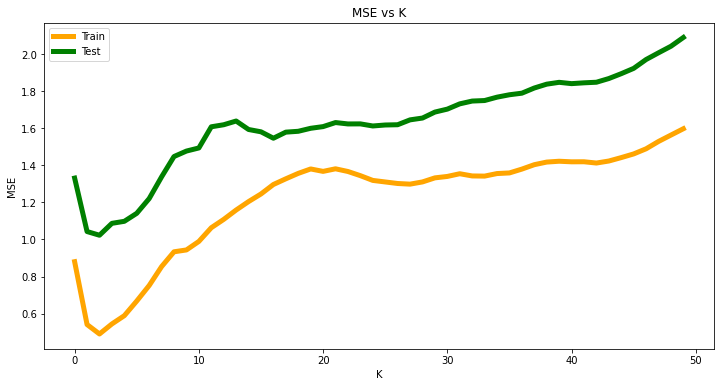

In [27]:
k_possibles = list(range(1,51))
train_errors, test_errors = list(), list()

for elem in k_possibles:
    preds = KNN_predict(X_train=X_delivery_train,y_train=y_delivery_train, X_test=X_delivery_train,k=elem)
    train_errors.append(mse(y_delivery_train, preds))
    
    preds_test = KNN_predict(X_train=X_delivery_train,y_train=y_delivery_train, X_test=X_delivery_test,k=elem)
    test_errors.append(mse(y_delivery_test, preds_test))

plt.figure(figsize=(12, 6)) 
plt.title("MSE vs K")
plt.xlabel("K")
plt.ylabel("MSE")
plt.plot(train_errors, color="orange", lw=5)
plt.plot(test_errors, color="green", lw=5)
plt.legend(["Train", "Test"])
plt.show()

#### 1G. Now, construct and fit a k-nearest neighbor model using the  KNeighborsRegressor() estimator in sklearn.neighbors module. Use the mean_square_error() function inside the sklearn.metrics module to compute the mse of the model on the test set. Is this similar to the mse value you got from the algorithm function you wrote from scratch? 

In [28]:
KNN = KNeighborsRegressor(n_neighbors = 5)
KNN.fit(X_delivery_train, y_delivery_train)
preds = KNN.predict(X_delivery_test)
preds

array([ 5.14,  6.26,  6.32,  6.2 ,  9.16,  9.22,  6.86,  8.22,  5.94,
        6.32,  9.22,  8.22,  5.94,  7.16,  7.06,  8.22,  6.42,  9.52,
        6.24,  7.54,  4.6 ,  9.22,  8.22,  8.6 ,  6.  ,  4.92,  9.16,
        6.28,  4.76,  6.26,  6.26,  6.24, 10.76,  9.46,  8.66,  7.58,
        5.3 ,  7.06,  8.66,  5.84,  4.76,  9.78,  7.5 ,  7.5 ,  8.22,
        5.44, 10.3 ,  5.44,  6.04,  6.26,  9.16,  7.  ,  8.22,  9.18,
        7.58,  8.6 ,  7.54,  6.24,  7.58,  6.  ,  7.5 ,  8.66,  7.06,
        8.16, 10.3 ,  9.18,  8.32,  9.16,  9.22,  4.6 ,  7.8 ,  5.3 ,
        6.34,  5.3 , 10.76,  9.22,  5.48,  4.62,  8.22,  6.58,  4.02,
        4.02,  8.4 ,  6.32,  9.46,  6.5 ,  6.66,  6.5 ,  6.94,  6.34,
        7.06,  6.24,  6.2 ,  7.58,  9.16,  9.22,  6.42,  4.22,  7.06,
        7.8 ,  7.54])

In [29]:
mean_squared_error(y_delivery_test, preds)

1.111271287128713

#### Is this similar to the mse value you got from the algorithm function you wrote from scratch?

Yes the values are similar.

#### 1H. Using the Pipeline constructor inside the sklearn.pipeline module, scale the X_delivery_train with the StandardScaler(), and also construct the KNeighborsRegressor() inside the Pipeline(). Then the call the fit() method on the pipeline object to fit the model into the delivery training data. Transform the X_delivery_test data using StandardScaler() and use the mean_squared_error () function inside the sklearn.metrics module to compute the mse of the model on the test set. Is this mse similar to the mse you got when you used the unscaled input data in (g) above?

In [30]:
knn_scaled = Pipeline([("scaler", StandardScaler()),("KNN", KNN)])
knn_scaled.fit(X_delivery_train, y_delivery_train)
knn_scaled_preds = knn_scaled.predict(X_delivery_test)
knn_scaled_preds

array([ 5.22,  5.94,  6.78,  6.08,  8.86,  9.96,  7.52,  8.24,  6.18,
        6.78,  9.96,  8.02,  6.18,  6.94,  7.22,  8.02,  6.04,  9.52,
        6.26,  8.48,  5.28,  9.96,  8.24,  8.62,  5.46,  4.76,  8.86,
        6.48,  4.44,  5.94,  4.82,  6.26, 10.76,  9.94,  8.22,  8.28,
        4.36,  7.22,  8.22,  6.02,  4.44,  9.86,  7.6 ,  7.6 ,  8.44,
        5.34,  9.42,  5.34,  5.68,  5.94,  8.62,  7.3 ,  8.24,  9.02,
        8.28,  9.04,  8.48,  6.26,  8.28,  5.46,  7.6 ,  8.22,  7.22,
        7.8 ,  9.42,  9.02,  8.9 ,  8.62,  9.96,  5.28,  8.28,  4.36,
        6.18,  4.36, 10.76,  9.96,  4.66,  4.56,  8.24,  6.88,  4.06,
        4.06,  9.1 ,  6.78,  9.94,  6.1 ,  6.92,  6.1 ,  7.76,  6.18,
        7.22,  6.26,  6.1 ,  8.28,  8.62,  9.96,  6.04,  4.06,  7.22,
        8.28,  8.48])

In [31]:
mean_squared_error(y_delivery_test, knn_scaled_preds)

0.94400396039604

#### Is this mse similar to the mse you got when you used the unscaled input data in (g) above?

The value for the scaled data is better with an MSE of 0.944 as compared to the unscaled data showing an MSE 0f 1.11

#### 1I. Use the scaled X_delivery_train and X_delivery_test data and the RandomForestRegressor constructor inside the sklearn.ensemble module to construct/fit a random forest model, the compute the mse for this model. Is this mse similar to the one you got in question (h) above? 

In [32]:
clf_rf = RandomForestRegressor()

rf_scaled = Pipeline([("scaler", StandardScaler()),("clf_rf", clf_rf)])
rf_scaled.fit(X_delivery_train, y_delivery_train)
rf_scaled_preds = rf_scaled.predict(X_delivery_test)
rf_scaled_preds

array([ 5.46851905,  6.35466667,  6.85015476,  5.7393    ,  9.0307    ,
       10.01769762,  8.06056667,  8.00945711,  6.10233889,  6.85015476,
       10.01769762,  8.07887262,  6.10233889,  6.85441389,  7.16995952,
        8.07887262,  6.17560924,  9.47847558,  6.41563214,  8.3805    ,
        5.40635   , 10.01769762,  8.00945711,  8.51033929,  6.05282262,
        4.72424008,  9.0307    ,  6.68811667,  4.87732976,  6.35466667,
        5.6383    ,  6.41563214, 10.7296824 ,  9.46613333,  8.76495   ,
        8.55933214,  4.582     ,  7.16995952,  8.76495   ,  5.16065   ,
        4.87732976,  9.95913171,  7.90850833,  7.90850833,  8.37283651,
        5.46494524,  9.52546667,  5.46494524,  6.04026548,  6.35466667,
       10.02583333,  7.0428131 ,  8.00945711,  9.36544643,  8.55933214,
        9.26338333,  8.3805    ,  6.41563214,  8.55933214,  6.05282262,
        7.90850833,  8.76495   ,  7.16995952,  8.5939869 ,  9.52546667,
        9.36544643,  8.83113611, 10.02583333, 10.01769762,  5.40

In [33]:
mean_squared_error(y_delivery_test, rf_scaled_preds)

0.9639734743946687

#### Is this mse similar to the one you got in question (h) above?

The MSE of the RF Regressor is not as good as the KNN scaled, however, it is better than the MSE of the unscaled data for KNN.

### Question 2

#### 2A. You would use the student data for classification: that is, GPA and Age would be used as input to predict wither a student will drop out of school (Dropped=1) or not drop (Dropped=0). You will write a k-nearest neighbor algorithm function that learns from the training set and classifies given test instances to class 0 or class 1. The input that the function takes include:
•	X_train: Pandas DataFrame or 2D NumPy array 

•	y_train: Pandas Series or 1D NumPy array

•	X_test: Pandas DataFrame or 2D NumPy array

•	K: the number of nearest neighbors. The default value should be k=5 if no k value is passed during function call. 

#### Use the following pseudo code to implement the algorithm (also see class notes on ideas for writing knn from scratch to see the details of each step in the body of the code). Scale the X_student_train and X_student_test data, and pass these scaled data sets in addition to y_student_train data into the knn_predict() function call to compute the predicted output values for the X_student_test set. You can reference the results using a variable, y_student_test_pred. 

In [37]:
def KNN_predict(X_train, y_train, X_test, k=5):
    y_pred=[]
    for i in range(0, len(X_test)):
        test_instance = np.array([X_test.iloc[i]])
        d=metrics.euclidean_distances(X_train, test_instance)
        nearest = np.argsort(d,axis=0)[:k]
        y_train_nearest_k=[y_train[int(i)] for i in nearest]
        y_pred.append(np.mean(y_train_nearest_k))
    return y_pred

y_student_test_pred = KNN_predict(X_student_train, y_student_train, X_student_test)
# y_student_test_pred

#### 2B. Define a function called overall_accuracy, that computes the overall accuracy of your algorithm. You can let your function compare the actual values (y) and the predicted or classified y values (y_pred), for example: overall accuracy could be computed using mean(y==y_pred)

In [44]:
def overall_accuracy(y_pred, y):
    count = 0
    for i in range(len(y_pred)):
        if y_pred[i] == y[i]:
            count += 1
            
    return print("Accuracy =", (count/len(y_pred))*100, "%")

overall_accuracy(y_student_test_pred, y_student_test)

Accuracy = 12.0 %


#### 2C. Use GridSearch in scikit learn to tune the parameter of the k-nearest neighbor classifier, then use that optimal parameter to compute the accuracy of the knn estimator on the test set. Is this accuracy score similar to that obtained using your knn algorithm from scratch?

In [65]:
knn_clf = KNeighborsClassifier()
param_grid = dict(n_neighbors = k_possibles)

grid_search = GridSearchCV(knn_clf, param_grid, cv = 8)
grid_search.fit(X_student_train, y_student_train)
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=27)

In [67]:
knn = KNeighborsClassifier(n_neighbors=27)

knn.fit(X_student_train, y_student_train)

y_student_test_pred = knn.predict(X_student_test)

overall_accuracy(y_student_test_pred, y_student_test)

Accuracy = 72.0 %


#### Is this accuracy score similar to that obtained using your knn algorithm from scratch?

No, the tuned model is showing a much better score.

#### 2D. Also build another model using a random forest classifier and compute the accuracy score on the test set. Which of these models is the better, the model is question 2c or this model in question 2d? Why or why not?

In [85]:
rf = RandomForestRegressor()
param_grid_rf = {'max_features':[0.2, 0.4, 0.6, 0.8], 'n_estimators':[3, 10, 30, 100]}

grid_search = GridSearchCV(rf, param_grid_rf, cv = 8)
grid_search.fit(X_student_train, y_student_train)
grid_search.best_estimator_

final_rf= grid_search.best_estimator_
final_rf.fit(X_student_test, y_student_test.values.ravel())
final_rf_preds = final_rf.predict(X_student_test)

In [86]:
overall_accuracy(final_rf_preds, y_student_test)

Accuracy = 17.0 %


#### Which of these models is the better, the model is question 2c or this model in question 2d? Why or why not?

The accuracy in 2C is better than the accuracy of 2D. we could try to tune the parameters of 2D more to get a better accuracy but as is KNN outperforms random forest.

### Question 3

#### 3A. State your research question 

Is KNN a good models for predicting what bank job category an employee belongs to based on education, gender and minority status?

#### 3B. Data pre-processing (to the extent deemed necessary: remember the knn algorithm depends on distances, so you need to rescale, normalize or standardize your input values to make sure no variable influences the predictions due to it scale). 

In [92]:
bankDF = pd.read_csv('BankWages.csv', index_col = 0)
bankDF.head(5)

,job,education,gender,minority
1,manage,15,male,no
2,admin,16,male,no
3,admin,12,female,no
4,admin,8,female,no
5,admin,15,male,no


In [95]:
bankDF['job'].replace(['manage', 'admin', 'custodial'],[0, 1, 2], inplace = True)
bankDF['gender'].replace(['male', 'female'],[0, 1], inplace = True)
bankDF['minority'].replace(['no', 'yes'], [0, 1], inplace = True)
bankDF.head()

,job,education,gender,minority
1,0,15,0,0
2,1,16,0,0
3,1,12,1,0
4,1,8,1,0
5,1,15,0,0


In [104]:
scaler = MinMaxScaler()
contCols = ['education']
contCols
bankDF.loc[:,contCols] = scaler.fit_transform(bankDF.loc[:,contCols])
bankDF.head(5)

,job,education,gender,minority
1,0,0.538462,0,0
2,1,0.615385,0,0
3,1,0.307692,1,0
4,1,0.000000,1,0
5,1,0.538462,0,0


#### 3C. Data splitting 

In [107]:
X = bankDF.drop(columns = ['job'])
y = bankDF['job']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print("Sizes of training and test sets:", [len(elem) for elem in [X_train, X_test, y_train, y_test]])

Sizes of training and test sets: [331, 143, 331, 143]


#### 3D. Model construction 

In [116]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, y_train)
preds = KNN.predict(X_test)
# preds

accuracy_score(y_test, preds)

0.8881118881118881

#### 3E. Hyperparameter turning (choose whatever approach your like)

In [119]:
knn_clf = KNeighborsClassifier()
param_grid = dict(n_neighbors = k_possibles)

grid_search = GridSearchCV(knn_clf, param_grid, cv = 8)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=4)

#### 3F. Use the best or optimal parameter values to build a model, then compute the accuracy score for your estimator. 

In [123]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)

accuracy_score(y_pred_train, y_train)

0.8972809667673716

In [121]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy_score(y_pred, y_test)

0.8881118881118881

#### Discuss about overfitting for the model 

Based on the accuracy scores of the train and test sets for the tuned model, it would appear that the model is not overfitting. The accuracy scores are very close to eachother. 